In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ticket_chunks = pd.read_csv('ticket_archive/tickets.csv.gz', sep=';', chunksize=10000)
chunk_list = list()
for chunk in ticket_chunks:
    chunk_df = chunk[chunk['Violation Code'].isin(['0964170A','0964170B'])]
    chunk_list.append(chunk_df)
res_bus_ticket_df = pd.concat(chunk_list)
print(res_bus_ticket_df.dtypes)
print(res_bus_ticket_df.shape)
res_bus_ticket_df.head()

Ticket Number             int64
License Plate Number     object
License Plate State      object
License Plate Type       object
Ticket Make              object
Issue Date               object
Violation Location       object
Violation Code           object
Violation Description    object
Badge                    object
Unit                     object
Ticket Queue             object
Hearing Dispo            object
dtype: object
(379349, 13)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo
83,9177566048,93955SB,IL,TRK,FORD,01/02/2009 09:24 am,2541 S HOMAN AVE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",636,498,Paid,NaN
95,9177638895,70303AB,IL,TRK,CHEV,01/05/2009 10:13 am,3406 W 62ND ST,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",661,498,Paid,NaN
163,55824052,85825N,IL,TRK,FORD,01/03/2009 07:05 pm,1845 W HOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",12842,24,Define,NaN
213,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,NaN
215,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,NaN


In [2]:
res_bus_ticket_df = pd.read_csv('res_bus_all_tickets.csv')
print(res_bus_ticket_df.shape)
print(res_bus_ticket_df.dtypes)
res_bus_ticket_df.head()

(379349, 13)
Ticket Number             int64
License Plate Number     object
License Plate State      object
License Plate Type       object
Ticket Make              object
Issue Date               object
Violation Location       object
Violation Code           object
Violation Description    object
Badge                    object
Unit                     object
Ticket Queue             object
Hearing Dispo            object
dtype: object


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo
0,9177566048,93955SB,IL,TRK,FORD,01/02/2009 09:24 am,2541 S HOMAN AVE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",636,498,Paid,NaN
1,9177638895,70303AB,IL,TRK,CHEV,01/05/2009 10:13 am,3406 W 62ND ST,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",661,498,Paid,NaN
2,55824052,85825N,IL,TRK,FORD,01/03/2009 07:05 pm,1845 W HOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",12842,24,Define,NaN
3,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,NaN
4,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,NaN


In [3]:
res_bus_ticket_df['Hearing Dispo'].unique()

array([nan, 'Not Liable', 'Liable', 'DOR Withdraw', 'Denied', 'Continued',
       'Withdrawn', 'Granted', 'Stricken'], dtype=object)

In [4]:
res_bus_ticket_df['License Plate Type'].unique()

array(['TRK', 'TXI', 'APP', 'PAS', 'SCH', 'RVM', 'TMP', 'TOW', 'FFM', nan,
       'LIV', 'ENV', 'PTR', 'SPM', 'TRL', 'IFF', 'DOM', 'VET', 'VVT',
       'COL', 'BUS', 'ORG', 'MAM', 'PML', 'ARM', 'PFR', 'HCP', 'SHF',
       'UVT', 'TRS', 'DLC', 'IPA', 'CUB', 'RVT', 'CBK', 'EGS', 'TRT',
       'OTH', 'WPP', 'USM', 'GVT', 'BUL', 'SPV', 'ANV', 'SOX', 'OVC',
       'IRT', 'FCH', 'GRD', 'NYV', 'UAV', 'TRN', 'PRM', 'CHV', 'EUA',
       'BRS', 'PET', 'WPB', 'FHM', 'YPG', 'VAN', 'INT', 'POW', 'CPM',
       'BRZ', 'RCG', 'IMC', 'SOT', 'PUR', 'RET', 'EDU', 'SAG', 'MSM',
       'SPC', 'FOP', 'MCY', 'FRM', 'HAM', 'TRF', 'PAT', 'ACM', 'MFR',
       'BKE', 'AFC', 'MUN', 'CER', 'AFR', 'SMW', 'SST', 'UNV', 'ELE',
       'ICM', 'NSC', 'HCS', 'MCR', 'DFC', 'UIC', 'REM', 'WVT', 'LTS',
       'DSC', 'TNT', 'DLT', 'AUA', 'DRV', 'RSS', 'ICC', 'RIN', 'AMU',
       'GLD', 'CON', 'EXP', 'HIM', 'STE', 'STS', 'SYG', 'SOS', 'NPD', 'POL'], dtype=object)

In [7]:
not_taxi_rb_df = res_bus_ticket_df[res_bus_ticket_df['License Plate Type'] != 'TXI']
not_taxi_rb_df['Hearing Dispo'].unique()

array([nan, 'Not Liable', 'DOR Withdraw', 'Liable', 'Denied', 'Continued',
       'Granted', 'Withdrawn', 'Stricken'], dtype=object)

In [8]:
taxi_res_bus_df = res_bus_ticket_df[res_bus_ticket_df['License Plate Type'] == 'TXI']
taxi_res_bus_df['Hearing Dispo'].unique()

array([nan, 'Liable', 'DOR Withdraw', 'Not Liable', 'Denied', 'Continued',
       'Withdrawn', 'Stricken'], dtype=object)

In [10]:
not_taxi_rb_df['Hearing Dispo'].fillna('Did Not Challenge', inplace=True)
not_taxi_rb_df.to_csv('not_taxi_res_bus_tickets.csv', index=False)
taxi_res_bus_df['Hearing Dispo'].fillna('Did Not Challenge', inplace=True)

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Residential and Business Street Parking Tickets
### Hearing Results for Non-Taxis and Taxis

### Not Taxis

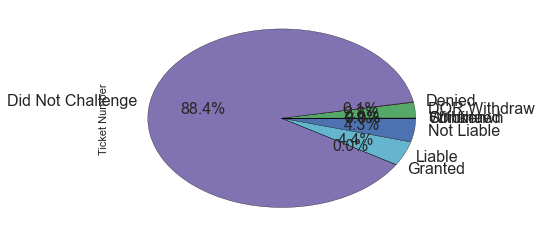

In [14]:
not_taxi_hearing = not_taxi_rb_df.groupby(['Hearing Dispo'])['Ticket Number'].count()
not_taxi_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

### Taxis

It looks like taxis are more likely to challenge these types of tickets, but this is also a ticket that has a different connotation and exemptions for taxis than for other vehicles. Will probably be more helpful to look at the total rate of challenges for taxis vs. non-taxis

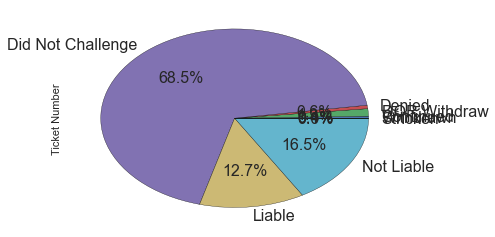

In [16]:
taxi_hearing = taxi_res_bus_df.groupby(['Hearing Dispo'])['Ticket Number'].count()
taxi_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

In [22]:
challenge_chunks = pd.read_csv('ticket_archive/tickets.csv.gz', sep=';', chunksize=10000)

taxi_challenge_chunks = list()
not_taxi_challenge_chunks = list()

for chunk in challenge_chunks:
    chunk['Hearing Dispo'].fillna('Did Not Challenge', inplace=True)
    
    taxi_rows = chunk[chunk['License Plate Type'] == 'TXI']
    not_taxi_rows = chunk[chunk['License Plate Type'] != 'TXI']
    
    taxi_results = taxi_rows.groupby(['Hearing Dispo'])['Ticket Number'].count()
    taxi_results_df = pd.DataFrame(taxi_results).reset_index()
    taxi_results_df['Percent'] = taxi_results_df['Ticket Number'].apply(lambda x: float(x)/taxi_results_df['Ticket Number'].sum())

    not_taxi_results = not_taxi_rows.groupby(['Hearing Dispo'])['Ticket Number'].count()
    not_taxi_results_df = pd.DataFrame(not_taxi_results).reset_index()
    not_taxi_results_df['Percent'] = not_taxi_results_df['Ticket Number'].apply(lambda x: float(x)/not_taxi_results_df['Ticket Number'].sum())
    
    taxi_challenge_chunks.append(taxi_results_df)
    not_taxi_challenge_chunks.append(not_taxi_results_df)

taxi_hearing_df = pd.concat(taxi_challenge_chunks)
not_taxi_hearing_df = pd.concat(not_taxi_challenge_chunks)

print(taxi_hearing_df.dtypes)
print(taxi_hearing_df.shape)

print(not_taxi_hearing_df.dtypes)
print(not_taxi_hearing_df.shape)

Hearing Dispo     object
Ticket Number      int64
Percent          float64
dtype: object
(8712, 3)
Hearing Dispo     object
Ticket Number      int64
Percent          float64
dtype: object
(11513, 3)


In [23]:
taxi_hearing_df[:10]

,Hearing Dispo,Ticket Number,Percent
0,DOR Withdraw,5,0.030864
1,Denied,1,0.006173
2,Did Not Challenge,101,0.623457
3,Liable,14,0.086420
4,Not Liable,41,0.253086
0,DOR Withdraw,3,0.017544
1,Denied,3,0.017544
2,Did Not Challenge,97,0.567251
3,Liable,15,0.087719
4,Not Liable,53,0.309942


In [26]:
not_taxi_hearing_df['Hearing Dispo'].unique()

array(['Continued', 'DOR Withdraw', 'Denied', u'Did Not Challenge',
       'Liable', 'Not Liable', 'Withdrawn', 'Granted', 'Stricken',
       'DUMMY CASE CREATED'], dtype=object)

In [28]:
taxi_hearing_grouped = taxi_hearing_df.groupby(['Hearing Dispo'])['Ticket Number'].sum()
taxi_hearing_grouped = pd.DataFrame(taxi_hearing_grouped).reset_index()
taxi_hearing_grouped

,Hearing Dispo,Ticket Number
0,Continued,585
1,DOR Withdraw,3590
2,Denied,2560
3,Did Not Challenge,153455
4,Liable,22745
5,Not Liable,78850
6,Stricken,17
7,Withdrawn,134


In [27]:
not_taxi_hearing_grouped = not_taxi_hearing_df.groupby(['Hearing Dispo'])['Ticket Number'].sum()
not_taxi_hearing_grouped = pd.DataFrame(not_taxi_hearing_grouped).reset_index()
not_taxi_hearing_grouped

,Hearing Dispo,Ticket Number
0,Continued,5402
1,DOR Withdraw,358286
2,DUMMY CASE CREATED,1
3,Denied,21520
4,Did Not Challenge,15250122
5,Granted,374
6,Liable,861052
7,Not Liable,1047299
8,Stricken,55
9,Withdrawn,771


# Challenges to Tickets for All Types: Taxis v Not Taxis

## Taxis

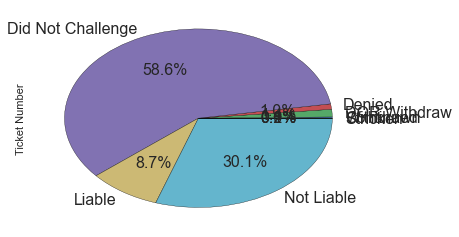

In [34]:
taxi_hearing_series = taxi_hearing_df.groupby(['Hearing Dispo'])['Ticket Number'].sum()
taxi_hearing_series.plot(kind='pie', autopct='%1.1f%%', fontsize=16)

## Not Taxis

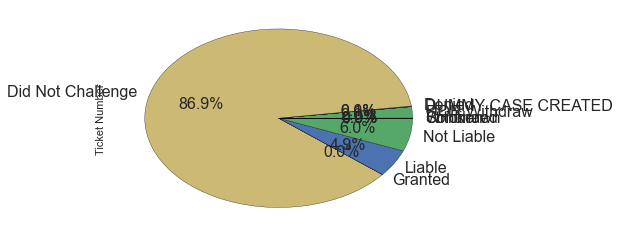

In [35]:
not_taxi_hearing_series = not_taxi_hearing_df.groupby(['Hearing Dispo'])['Ticket Number'].sum()
not_taxi_hearing_series.plot(kind='pie', autopct='%1.1f%%', fontsize=16)

## Initial Results

* Taxis are actually much more likely to contest a ticket than the rest of the population
* Intuitively, this makes sense, given that the probably encounter many more tickets that the general population